In [1]:
import tensorflow as tf
from keras.models import Model, load_model

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
from matplotlib.pyplot import imshow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import video_nn_recognition_library as nn
import video_cnn_recognition_library as cnn
import model_visualization_library as mv
import video_recognition_library as vrl
import datetime
import time

In [3]:
base_path = 'bin\\'

In [18]:
metadata = pd.read_csv(base_path + 'metadata.csv')
print(len(metadata))

4


fearful
(1, 5, 200, 200, 1)


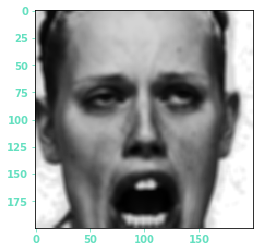

In [5]:
#For small test
image_num = 0
print(metadata.emotion[image_num])
frames = cnn.preprocess_video(metadata.file_name[image_num])
print(frames.shape)
imshow(frames[0][1].reshape(200,200), cmap='gray')

In [6]:
model_name = 'model_11_20_1500_1'

In [7]:
time_start = datetime.datetime.now()
model = load_model("models\\{0}.hdf5".format(model_name))
time_end = datetime.datetime.now()
time_duration = time_end - time_start
print("Time for loading: {0}".format(time_duration.total_seconds()))

Time for loading: 4.175653


In [8]:
metadata.shape[0]

4

In [27]:
import datetime
import time
def test_model(preprocess):
    print(datetime.datetime.now())

    file_names = []
    time_preprocessing = []
    time_prediction = []
    y_test_true = []
    y_test_pred = []

    source = metadata
    for i in range(source.shape[0]):
    #for i in range(0,2):
        #print(metadata.file_name[i])
        #File name
        file_names.append(metadata.file_name[i])

        #True emotion
        y_test_true.append(metadata.emotion[i])

        ### Time for Preprocessing
        time_start = datetime.datetime.now()

        #Video preprocessing
        tensor = preprocess(metadata.file_name[i])
        #tensor = cnn.preprocess_video(metadata.file_name[i])
        #tensor = nn.preprocess_video(metadata.file_name[i])

        time_end = datetime.datetime.now()
        time_duration = time_end - time_start

        time_preprocessing.append(time_duration.total_seconds())

        ### Time for Preprocessing - end
        if len(tensor) != 0:
            ### Time for Prediction
            time_start = datetime.datetime.now()
            #Make prediction
            res = model.predict(tensor)

            time_end = datetime.datetime.now()
            time_duration = time_end - time_start

            time_prediction.append(time_duration.total_seconds())
            ### Time for Prediction - end
        else:
            time_prediction.append(-1)

        y_test_pred.append(res)
    print(datetime.datetime.now())

In [28]:
test_model(cnn.preprocess_video)

2018-12-14 18:50:01.450750
2018-12-14 18:50:07.633745


In [20]:
#For working with dictionary
def get_keys(dictionary, values):
    keys = list()
    items = dictionary.items()
    for item in items:
        if item[1] in values:
            keys.append(item[0])
    return  keys
def get_first_key(dictionary, values):
    items = dictionary.items()
    for item in items:
        if item[1] in values:
            return item[0]
    return null
def get_first_keys(dictionary, values):
    res = []
    for i in range(len(values)):
        res.append(get_first_key(dictionary, values[i]))
    return res

In [22]:
y_test_pred = np.array(y_test_pred)
y_test_true = np.array(y_test_true)
print(y_test_pred)
print(y_test_true)
y_test_pred = y_test_pred.argmax(axis=-1).reshape(-1,)
y_test_true = get_first_keys(vrl.emotions, y_test_true)
print(y_test_pred)
print(y_test_true)

[[[8.96737278e-01 9.28992085e-05 3.17430388e-10 1.01498485e-01
   3.63854415e-05 1.46460643e-05 1.62028451e-03 7.10403633e-13]]

 [[6.09849453e-01 3.36077093e-04 3.74994897e-07 3.89315873e-01
   4.50218613e-06 2.13965518e-06 4.47200931e-04 4.43880126e-05]]

 [[9.97801125e-01 4.66082856e-05 5.04553973e-05 1.82648667e-03
   7.24414276e-05 1.96349138e-04 4.86237195e-06 1.67260123e-06]]

 [[9.99929905e-01 5.55054136e-09 6.08016308e-07 6.86777130e-05
   7.90246418e-07 2.27291831e-11 3.32890231e-08 8.31849922e-10]]]
['fearful' 'angry' 'angry' 'angry']
[0 0 0 0]
[3, 0, 0, 0]


In [23]:
time_preprocessing

[1.164001, 1.541015, 1.530026, 1.38101]

In [24]:
a = file_names
b = y_test_true
c = y_test_pred
d = time_preprocessing
e = time_prediction
with open("bin\\{0}.txt".format(model_name),'w') as f:
    f.write("file_name;initial;prediction;time_preprocessing;time_preiction\n")
    for x, y, z, t, u in zip(a,b,c,d,e):
        f.write("{0};{1};{2};{3};{4}\n".format(x, y, z, t, u))

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_true, y_test_pred)
print(cm)

[[3 0]
 [1 0]]


cm = [
[163,6,0,24,2,2,6,0],
[6,177,0,0,8,4,19,0],
[24,3,70,9,0,3,13,3],
[19,15,0,107,5,12,31,14],
[0,6,0,6,184,0,2,1],
[10,1,0,3,6,100,0,0],
[17,30,0,43,12,37,250,4],
[1,1,0,17,0,1,10,120],

]
cm = np.array(cm)
print(cm)

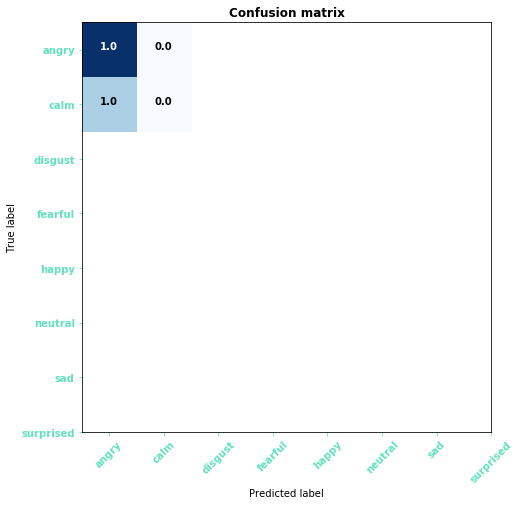

In [26]:
plt.figure(figsize=(7, 7))
mv.plot_confusion_matrix(cm, list(vrl.emotions.values()), cmap=plt.cm.Blues)
plt.show()